# Imports

In [1]:
import os
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from matplotlib.image import imread
import matplotlib.pyplot as plt
import random
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Dropout
from keras.layers import Dense , Flatten 
from keras.preprocessing.image import ImageDataGenerator , load_img
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
!pip install imutils

In [3]:
import keras
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.layers import Dense, Dropout
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers

# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Activation, Dropout,Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Lambda, Input, AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from matplotlib.image import imread
import matplotlib.pyplot as plt
import random
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Dropout
from keras.layers import Dense , Flatten 
from keras.preprocessing.image import ImageDataGenerator , load_img
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import shutil
import cv2
import os

# Getting dataset from folder

In [4]:
for dirname, _, filenames in os.walk("archive/chest_xray"):
    print(dirname)

#Seperate train/test, normal/pneumonia
chest_xray_train_normal = os.listdir("archive/chest_xray/chest_xray/train/NORMAL/")
chest_xray_train_pneumonia = os.listdir("archive/chest_xray/chest_xray/train/PNEUMONIA/")
chest_xray_test_normal = os.listdir("archive/chest_xray/chest_xray/test/NORMAL")
chest_xray_test_pneumonia = os.listdir("archive/chest_xray/chest_xray/test/PNEUMONIA")

archive/chest_xray
archive/chest_xray\chest_xray
archive/chest_xray\chest_xray\test
archive/chest_xray\chest_xray\test\NORMAL
archive/chest_xray\chest_xray\test\PNEUMONIA
archive/chest_xray\chest_xray\train
archive/chest_xray\chest_xray\train\NORMAL
archive/chest_xray\chest_xray\train\PNEUMONIA
archive/chest_xray\chest_xray\val
archive/chest_xray\chest_xray\val\NORMAL
archive/chest_xray\chest_xray\val\PNEUMONIA
archive/chest_xray\test
archive/chest_xray\test\NORMAL
archive/chest_xray\test\PNEUMONIA
archive/chest_xray\train
archive/chest_xray\train\NORMAL
archive/chest_xray\train\PNEUMONIA
archive/chest_xray\val
archive/chest_xray\val\NORMAL
archive/chest_xray\val\PNEUMONIA
archive/chest_xray\__MACOSX
archive/chest_xray\__MACOSX\chest_xray
archive/chest_xray\__MACOSX\chest_xray\test
archive/chest_xray\__MACOSX\chest_xray\test\NORMAL
archive/chest_xray\__MACOSX\chest_xray\test\PNEUMONIA
archive/chest_xray\__MACOSX\chest_xray\train
archive/chest_xray\__MACOSX\chest_xray\train\NORMAL
archi

## Check if train data is obtained correctly

In [5]:
# To store the file names and category
filenames = []
Category = []

# Appending all the normal images to filenames and category to Category
for file in chest_xray_train_normal:
    filenames.append(file)
    Category.append("NORMAL")
    
# Appending all the pneumonia images to filenames and category to Category
for file in chest_xray_train_pneumonia:
    filenames.append(file)
    Category.append("PNEUMONIA")
    
# To find the total number of observations we have
print(len(filenames))
print(len(Category))

5218
5218


In [6]:
df_train = pd.DataFrame({
    "Files" : filenames,
    "Category" : Category
})

df_train.head(10)

,Files,Category
0,.DS_Store,NORMAL
1,IM-0115-0001.jpeg,NORMAL
2,IM-0117-0001.jpeg,NORMAL
3,IM-0119-0001.jpeg,NORMAL
4,IM-0122-0001.jpeg,NORMAL
5,IM-0125-0001.jpeg,NORMAL
6,IM-0127-0001.jpeg,NORMAL
7,IM-0128-0001.jpeg,NORMAL
8,IM-0129-0001.jpeg,NORMAL
9,IM-0131-0001.jpeg,NORMAL


In [7]:
df_train.info

<bound method DataFrame.info of                          Files   Category
0                    .DS_Store     NORMAL
1            IM-0115-0001.jpeg     NORMAL
2            IM-0117-0001.jpeg     NORMAL
3            IM-0119-0001.jpeg     NORMAL
4            IM-0122-0001.jpeg     NORMAL
...                        ...        ...
5213   person99_virus_183.jpeg  PNEUMONIA
5214  person9_bacteria_38.jpeg  PNEUMONIA
5215  person9_bacteria_39.jpeg  PNEUMONIA
5216  person9_bacteria_40.jpeg  PNEUMONIA
5217  person9_bacteria_41.jpeg  PNEUMONIA

[5218 rows x 2 columns]>

## Check if test data is obtained correctly using pandas

In [8]:
test_files = []
test_category = []
for file in chest_xray_test_normal:
    test_files.append(file)
    test_category.append("NORMAL")

for file in chest_xray_test_pneumonia:
    test_files.append(file)
    test_category.append("PNEUMONIA")
    
print(len(test_files))
print(len(test_category))

624
624


In [9]:
df_test = pd.DataFrame({
    "Files" : test_files,
    "Category" : test_category
})

df_test.head(10)

,Files,Category
0,IM-0001-0001.jpeg,NORMAL
1,IM-0003-0001.jpeg,NORMAL
2,IM-0005-0001.jpeg,NORMAL
3,IM-0006-0001.jpeg,NORMAL
4,IM-0007-0001.jpeg,NORMAL
5,IM-0009-0001.jpeg,NORMAL
6,IM-0010-0001.jpeg,NORMAL
7,IM-0011-0001-0001.jpeg,NORMAL
8,IM-0011-0001-0002.jpeg,NORMAL
9,IM-0011-0001.jpeg,NORMAL


In [10]:
df_test.info

<bound method DataFrame.info of                           Files   Category
0             IM-0001-0001.jpeg     NORMAL
1             IM-0003-0001.jpeg     NORMAL
2             IM-0005-0001.jpeg     NORMAL
3             IM-0006-0001.jpeg     NORMAL
4             IM-0007-0001.jpeg     NORMAL
..                          ...        ...
619  person96_bacteria_465.jpeg  PNEUMONIA
620  person96_bacteria_466.jpeg  PNEUMONIA
621  person97_bacteria_468.jpeg  PNEUMONIA
622  person99_bacteria_473.jpeg  PNEUMONIA
623  person99_bacteria_474.jpeg  PNEUMONIA

[624 rows x 2 columns]>

# Preparing the data

## Split to arrays train/test, img/labels

In [11]:
train_images = []
train_labels = []
test_images = []
test_labels = []

## Read the files in the directory as images and append into numpy array
## Convert size of image to 128,128 using cv2

## Train/normal folder into train_images array

In [12]:
for file in chest_xray_train_normal:
    try:
        img = cv2.imread("archive/chest_xray/chest_xray/train/NORMAL/"+file,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(128,128))
    
        train_images.append(np.array(img))
        train_labels.append("NORMAL")

    except:
        pass

## Train/pneumonia folder into train_images array

In [13]:
for file in chest_xray_train_pneumonia:
    try :
        img = cv2.imread("archive/chest_xray/chest_xray/train/PNEUMONIA/"+file,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(128,128))
    
        train_images.append(np.array(img))
        train_labels.append("PNUEMONIA")
        
    except: 
        pass 

## Test/normal folder into test_images array

In [14]:
for file in chest_xray_test_normal:
    
    try:
        img = cv2.imread("archive/chest_xray/chest_xray/test/NORMAL/"+file,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(128,128))
    
        test_images.append(np.array(img))
        test_labels.append("NORMAL")
    
    except:
        pass

## Test/pneumonia folder into test_images array

In [15]:
for file in chest_xray_test_pneumonia:
    
    try:
        img = cv2.imread("archive/chest_xray/chest_xray/test/PNEUMONIA/"+file,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(128,128))
    
        test_images.append(np.array(img))
        test_labels.append("PNUEMONIA")    
    
    except:
        pass

## Check if amount of images matches labels

In [16]:
print("train images: ",len(train_images))
print("train labels: ",len(train_labels))
print("test images: ",len(test_images))
print("test labels: ",len(test_labels))

train images:  5216
train labels:  5216
test images:  624
test labels:  624


## Image check

In [17]:
dimensions = train_images[1].shape
print("The shape of Image is : ",dimensions)
print("Height of Image is : ",dimensions[0])
print("Width of Image is : ",dimensions[1])
print("Number of channels : ",dimensions[2])

The shape of Image is :  (128, 128, 3)
Height of Image is :  128
Width of Image is :  128
Number of channels :  3


## Convert to numpy array

In [18]:
train_images = np.array(train_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

## Show images

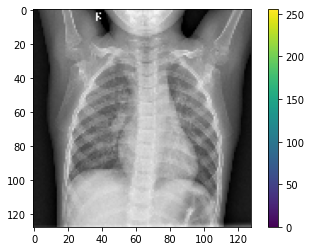

In [19]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Before feeding the images into the model, ensure all the images are between the range of 0 and 1. But since all images are in black and white, no rescaling required

In [20]:
#train_images = train_images / 255.0
#test_images = test_images / 255.0

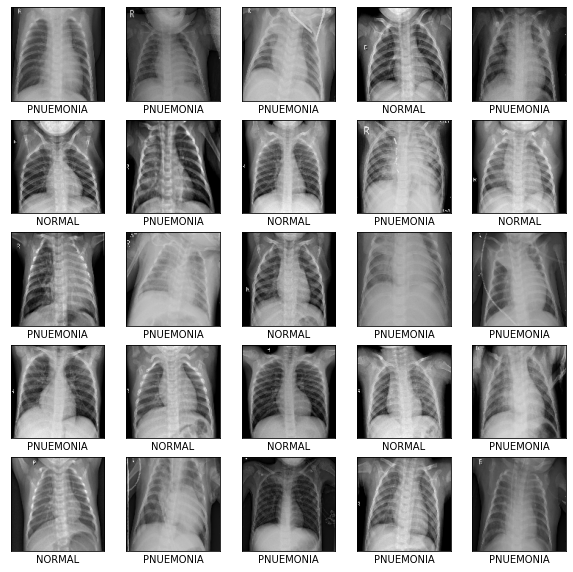

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    j = random.randint(0,len(train_labels))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[j], cmap=plt.cm.binary)
    plt.xlabel(train_labels[j])
plt.show()

# Build the model

## Encoding the categories using OneHotEncoder

In [34]:
enc = LabelEncoder()
train_labels = enc.fit_transform(train_labels)
test_labels = enc.fit_transform(test_labels)

sgd = SGD(lr = 0.1 , decay = 1e-2 , momentum = 0.9 )

In [ ]:
## Setup vgg19 model

In [31]:
# should be using this to load the model of vgg16/19. and probably the subsequent codes below
# load the VGG16 network, ensuring the head FC layer sets are left
# off
# baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
baseModel = VGG19(weights='imagenet', include_top=False, input_tensor = Input(shape=(128,128,3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(2, 2))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.6)(headModel)
headModel = Dense(1, activation="sigmoid")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
modelv = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False

In [32]:
modelv.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)      

In [33]:
# compile our model
print("[INFO] compiling model...")
#opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
modelv.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
# H = modlv.fit(training_set,
#                          steps_per_epoch = 150,
#                          epochs = 3,
#                          validation_data = validation_generator,
#                          validation_steps = 500)


H = modelv.fit(train_images,train_labels,epochs = 1)

[INFO] compiling model...
[INFO] training head...
163/163 [==============================] - 323s 2s/step - loss: 0.5274 - accuracy: 0.9143


## Setup layers, our own sequential model instead of pre trained

In [35]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256 , (3,3) , activation = 'relu'))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

## Compile the models

In [36]:
model.compile( loss = "binary_crossentropy" , optimizer  = 'adam' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       2

# Train the model

## Feed the model

In [37]:
model.fit(train_images,train_labels,epochs = 1)

163/163 [==============================] - 106s 652ms/step - loss: 4.0763 - accuracy: 0.8604


## Evaluate the accuracy

In [38]:
loss , accuracy = model.evaluate(test_images , test_labels , batch_size = 1)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

624/624 [==============================] - 16s 25ms/step - loss: 0.4436 - accuracy: 0.8333
Test accuracy: 83.33%


In [49]:
# # Evaluate the other model accuracy and other stuff
# accs = H.history['accuracy']
# val_accs = H.history['val_accuracy']

# plt.plot(range(len(accs)),accs, label = 'Training_accuracy')
# plt.plot(range(len(accs)),val_accs, label = 'Validation_accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epochs')
# plt.legend()
# plt.show()


# loss , accuracy = H.evaluate(test_images , test_labels , batch_size = 1)
accuracy = H.history['accuracy']
print(accuracy)

# print('Test accuracy: {:2.2f}%'.format(H.history['accuracy']*100))

[0.9143021702766418]


# Make predictions

In [26]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [28]:
predictions = probability_model.predict(test_images)

In [34]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

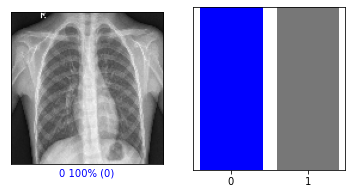

In [35]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

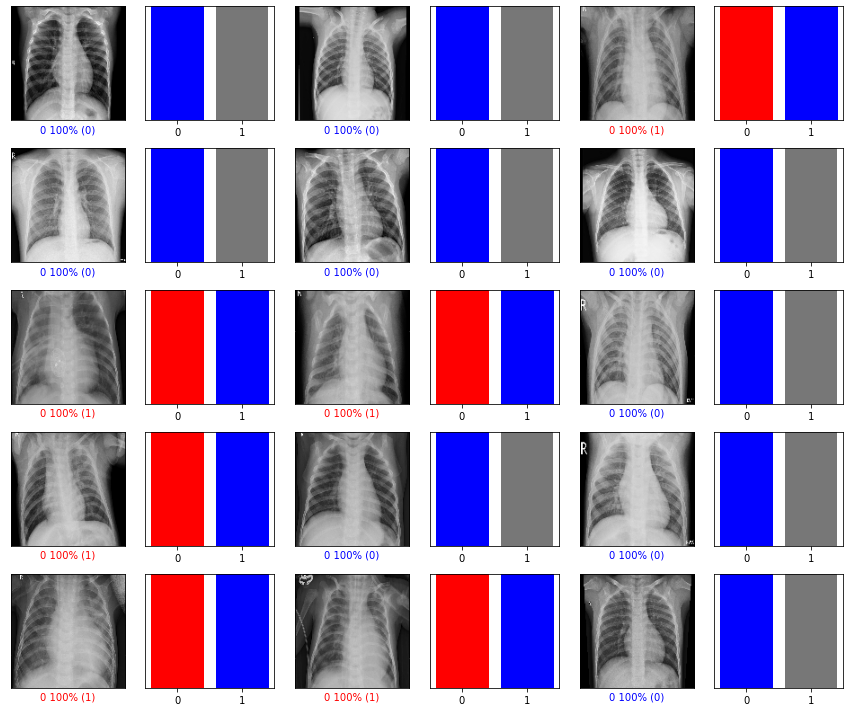

In [36]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    j = random.randint(0,len(test_labels))
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(j, predictions[j], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(j, predictions[j], test_labels)
plt.tight_layout()
plt.show()

In [56]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = modelv.predict(test_images)
# predIdxs = modelv.predict(test_images, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxsnp = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(test_labels, predIdxsnp))
# print(classification_report(test_labels.argmax(axis=1), predIdxs, target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.38      1.00      0.55       234
           1       0.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.19      0.50      0.27       624
weighted avg       0.14      0.38      0.20       624

